### 22. Geographical Plotting-Choropleth Map:

* https://plot.ly/python/reference/#choropleth For reference

#### 22.0: Offline Plotly Usage

In [16]:
import pandas as pd
import numpy as np
import plotly.plotly as pl
import plotly.graph_objs as graph_objs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
init_notebook_mode(connected=True) # Now set up everything so that the figures show up in the notebook:

#### 22.1 Choropleth US Maps

* Plotly's mapping can be a bit hard to get used to at first, remember to reference the cheat sheet in the data visualization folder, or find it online here: https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf

Easiest way to do this is to use the **dict()** function of the general form:

* type = 'choropleth',
* locations = list of states
* locationmode = 'USA-states'
* colorscale= 

Either a predefined string:

    'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

or create a [custom colorscale](https://plot.ly/python/heatmap-and-contour-colorscales/)

* text= list or array of text to display per point
* z= array of values on z axis (color of state)
* colorbar = {'title':'Colorbar Title'})

In [3]:
from IPython.display import Image
#This is not required for Choropleth map, but for insert image into this notebook.

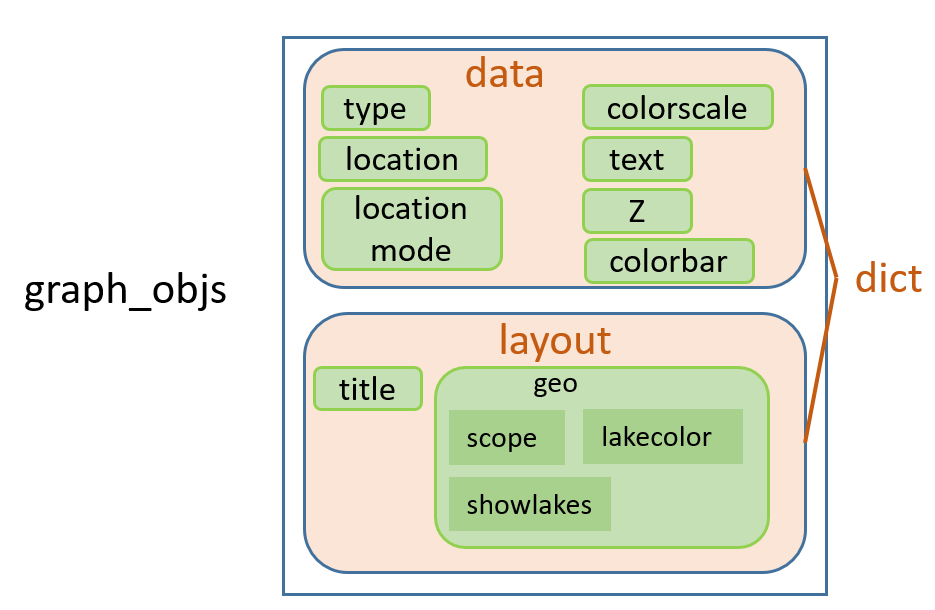

In [4]:
Image(filename='Image/Choromap.png')

#### 22.2 Data + Choropleth map:

In [30]:
dataDict = dict(type='choropleth', 
            locationmode='USA-states', 
            locations=['AZ','MA','NY'], 
            text=['Arizona', 'Masschussets', 'New York'],
            z=[1.3,5.1,9.6],
            colorscale='Portland', 
            colorbar={'title': 'Colorbar Title'})

In [31]:
layoutDict=dict(geo={'scope':'usa'})

Then we use:

* go.Figure(data = [data],layout = layout)  

to set up the object that finally gets passed into iplot()

In [32]:
choromap=graph_objs.Figure(data=[dataDict], layout=layoutDict)

In [33]:
iplot(choromap) # Offline.

In [24]:
#pl.iplot(choromap) 
# PlotlyError ERROR: Aw, snap! We didn't get a username with your request.

#### 22.3 Real Data US Map Choropleth

* 2011 US Agriculture Exports by State:

In [25]:
df=pd.read_csv("Data/2011_US_AGRI_Exports")
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [50]:
dataDict = dict(type='choropleth', 
            locationmode='USA-states',  # locationmode ( enumerated : "ISO-3" | "USA-states" | "country names" ): Determines the set of locations used to match entries in `locations` to regions on the map.
            locations=df['code'], 
            text=df['text'],
            z=df['total exports'],
            marker = dict(line=dict(color='rgb(255,255,255)', width=2)), # self define the marker
            colorscale='YlOrRd', 
            colorbar={'title':'colorbar title'}
            )

In [51]:
layoutDict=dict(title="2011 US Agriculture Exports by State",
               geo=dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)'))

In [52]:
choromap2=graph_objs.Figure(data=[dataDict], layout=layoutDict)
iplot(choromap2)

#### 22.4 World map:

In [98]:
data_w=pd.read_csv("Data/2014_World_GDP")
data_w

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
5,Angola,131.40,AGO
6,Anguilla,0.18,AIA
7,Antigua and Barbuda,1.24,ATG
8,Argentina,536.20,ARG
9,Armenia,10.88,ARM


In [99]:
dataDict_w=dict(
               type='choropleth',
               locations=data_w['CODE'],
               text=data_w['COUNTRY'],
               z=data_w['GDP (BILLIONS)'],
               colorbar={'title':'GDP Billions World'}
               )

In [100]:
layoutDict_w=dict(title='2018 Global GDP', 
                 geo=dict(
                     showframe = False,
                     projection={'type':'orthographic'} # Projection: type ( enumerated : "equirectangular" | "mercator" | "orthographic" | "natural earth" | "kavrayskiy7" | "miller" | "robinson" | "eckert4" | "azimuthal equal area" | "azimuthal equidistant" | "conic equal area" | "conic conformal" | "conic equidistant" | "gnomonic" | "stereographic" | "mollweide" | "hammer" | "transverse mercator" | "albers usa" | "winkel tripel" | "aitoff" | "sinusoidal" ) 
                     )
                 )

In [101]:
choromap=graph_objs.Figure(data=[dataDict_w], layout=layoutDict_w)
iplot(choromap)

### 23. Use pandas to directly read data from Google finance using pandas!

* Pandas datareader allows you to read stock information directly from the internet

In [ ]:
from pandas_datareader import data, wb